## Features:
#### SeriousDlqin2yrs -	                    Person experienced 90 days past due delinquency or worse (Y/N)
#### RevolvingUtilizationOfUnsecuredLines -	Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits	                              
#### age -	                                    Age of borrower in years	                                        
#### NumberOfTime30-59DaysPastDueNotWorse -	Number of times borrower has been 30-59 days past due but no worse in the last 2 years.	                                                                                                   
#### DebtRatio -	                            Monthly debt payments, alimony,living costs divided by monthy gross income	                                            
#### MonthlyIncome -	                        Monthly income	                                                    
#### NumberOfOpenCreditLinesAndLoans -	        Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)	                                                                              
#### NumberOfTimes90DaysLate -	                Number of times borrower has been 90 days or more past due.	        
#### NumberRealEstateLoansOrLines -	        Number of mortgage and real estate loans including home equity lines of credit	                          
#### NumberOfTime60-89DaysPastDueNotWorse -	Number of times borrower has been 60-89 days past due but no worse in the last 2 years.	    
#### NumberOfDependents -	                    Number of dependents in family excluding themselves (spouse, children etc.)	            

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from scipy import stats
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import train_test_split

In [149]:
# Load the data
cs_train = pd.read_csv( 'cs-training.csv' )

# EDA (Exploratory Data Analysis)

In [150]:
cs_train.shape

(150000, 12)

In [151]:
cs_train.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [152]:
cs_train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [153]:
# drop the serial number column
cs_train=cs_train.drop(columns=['Unnamed: 0'])

In [154]:
cs_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.6 MB


In [155]:
cs_train.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [156]:
cs_train.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,150000.0,0.240387,4.155179,0.0,0.000000,0.000000,0.000000,98.0


In [157]:
# check for missing values
cs_train.isnull().any().sum()

2

In [158]:
cs_train.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [159]:
# impute missing values
cs_train.fillna(cs_train.mean(), inplace=True)

In [160]:
cs_train.SeriousDlqin2yrs.value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

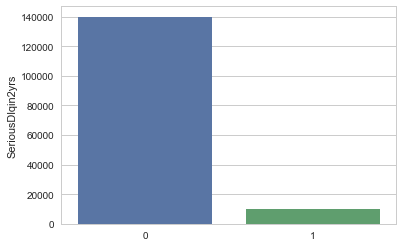

In [161]:
delinquents = pd.DataFrame(cs_train.SeriousDlqin2yrs.value_counts())
sns.barplot(delinquents.index,delinquents.SeriousDlqin2yrs)

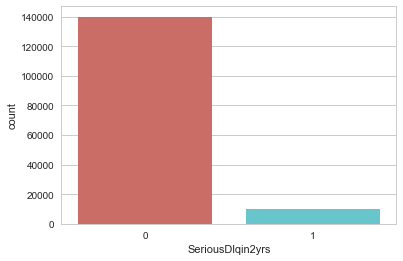

In [162]:
sns.countplot(x='SeriousDlqin2yrs',data=cs_train,palette='hls')

6.684% have experienced 90 days past due delinquency or worse

In [163]:
cs_train.groupby('SeriousDlqin2yrs').mean()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,,,,,,,,,,
0,6.168855,52.751375,0.280109,357.151168,6732.277204,8.493620,0.135225,1.020368,0.126666,0.743787
1,4.367282,45.926591,2.388490,295.121066,5803.851610,7.882306,2.091362,0.988530,1.828047,0.944798


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1117de080>,
      dtype=object)

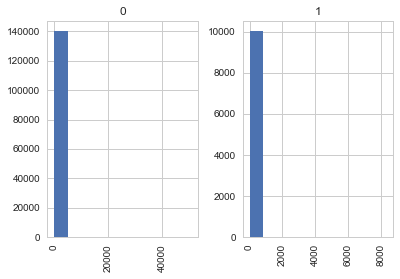

In [164]:
# Feature 1: RevolvingUtilizationOfUnsecuredLines
cs_train.hist(column='RevolvingUtilizationOfUnsecuredLines',by='SeriousDlqin2yrs',bins=10)

This shows that 'Revolving Utilization of Unsecured Lines' is not a big deciding factor on its own as there is no appreciable difference between the people who have experienced serious delinquency and who haven't.

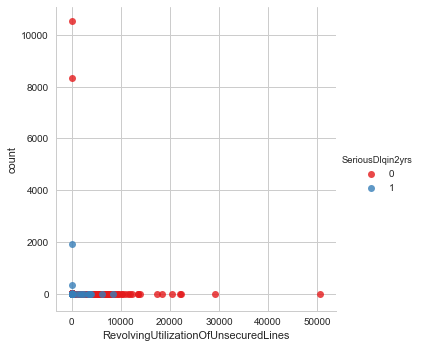

In [165]:
# another way of confirming the same
delinquency_by_rev = cs_train[['RevolvingUtilizationOfUnsecuredLines', 'SeriousDlqin2yrs']].groupby(['RevolvingUtilizationOfUnsecuredLines', 'SeriousDlqin2yrs']).size().reset_index()
delinquency_by_rev.columns = ['RevolvingUtilizationOfUnsecuredLines', 'SeriousDlqin2yrs', 'count']
sns.lmplot(x = 'RevolvingUtilizationOfUnsecuredLines', y = 'count', data = delinquency_by_rev, hue = "SeriousDlqin2yrs", 
           palette="Set1", fit_reg = False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a23ebf748>,
      dtype=object)

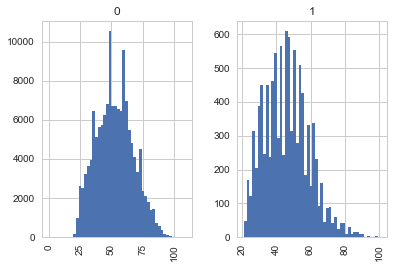

In [166]:
# Feature 2: age
cs_train.hist(column='age',by='SeriousDlqin2yrs',bins=50)

The Serious Delinquency depends a great deal on the age. Thus, age can be a good predictor of the outcome variable.

Text(0,0.5,'Frequency')

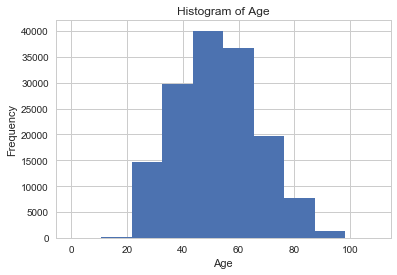

In [167]:
cs_train.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

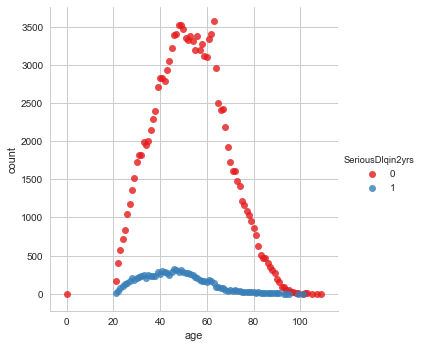

In [168]:
delinquency_by_age = cs_train[['age', 'SeriousDlqin2yrs']].groupby(['age', 'SeriousDlqin2yrs']).size().reset_index()
delinquency_by_age.columns = ['age', 'SeriousDlqin2yrs', 'count']
sns.lmplot(x = 'age', y = 'count', data = delinquency_by_age, hue = "SeriousDlqin2yrs", 
           palette="Set1", fit_reg = False)

In [169]:
delinquents=delinquency_by_age[(delinquency_by_age.SeriousDlqin2yrs==1)].sort_values(by='count', ascending=False)
delinquents.describe().T

,count,mean,std,min,25%,50%,75%,max
age,76.0,58.657895,22.358028,21.0,39.75,58.5,77.25,101.0
SeriousDlqin2yrs,76.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
count,76.0,131.921053,109.342247,1.0,21.25,128.5,235.50,324.0


In [170]:
cs_train.groupby('age').mean()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
age,,,,,,,,,,
0,0.000000,1.000000,1.000000,0.436927,6000.000000,6.000000,0.000000,2.000000,0.000000,2.000000
21,0.071038,0.644440,11.814208,34.961721,2733.211615,1.251366,11.792350,0.032787,11.792350,0.155595
22,0.082949,0.596622,5.718894,27.833068,2608.793157,1.824885,5.677419,0.004608,5.663594,0.105471
23,0.109204,0.572803,2.251170,23.057826,2699.484986,2.268331,2.229329,0.004680,2.185647,0.155699
24,0.120098,1.298309,2.333333,47.577035,2987.936621,2.997549,2.296569,0.026961,2.238971,0.173290
25,0.126967,0.748182,1.939140,60.692332,3207.007884,3.865687,1.904512,0.034627,1.858342,0.243775
26,0.123219,4.428287,1.048617,79.419637,3464.295091,4.455993,0.979883,0.108131,0.932104,0.278353
27,0.124066,5.893830,1.340807,103.405992,3789.928178,5.030643,1.246637,0.186099,1.183857,0.338120
28,0.131410,6.284146,1.043590,98.827569,4019.762616,5.346154,0.944872,0.259615,0.865385,0.410442


In [171]:
cs_train.age.value_counts()

49     3837
48     3806
50     3753
63     3719
47     3719
46     3714
53     3648
51     3627
52     3609
56     3589
62     3568
54     3561
61     3522
45     3502
58     3443
55     3416
57     3375
44     3294
59     3280
60     3258
43     3208
41     3122
40     3093
42     3082
64     3058
39     2987
38     2631
65     2594
37     2521
67     2503
       ... 
24      816
81      774
82      647
23      641
83      512
85      483
84      480
22      434
86      407
87      357
88      313
89      276
90      198
21      183
91      154
92       93
93       87
94       47
95       45
96       18
97       17
99        9
98        6
103       3
102       3
101       3
109       2
107       1
105       1
0         1
Name: age, Length: 86, dtype: int64

In [172]:
# Age 0 is incorrect data
cs_train[cs_train.age==0]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
65695,0,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0


In [173]:
cs_train[(cs_train.MonthlyIncome==6000.0) & (cs_train.NumberOfDependents==2.0)].mean()

SeriousDlqin2yrs                           0.061290
RevolvingUtilizationOfUnsecuredLines      10.182295
age                                       45.483871
NumberOfTime30-59DaysPastDueNotWorse       0.270968
DebtRatio                                  0.372518
MonthlyIncome                           6000.000000
NumberOfOpenCreditLinesAndLoans            8.919355
NumberOfTimes90DaysLate                    0.058065
NumberRealEstateLoansOrLines               1.164516
NumberOfTime60-89DaysPastDueNotWorse       0.080645
NumberOfDependents                         2.000000
dtype: float64

In [174]:
# correct Age=0
cs_train['age'] = cs_train['age'].replace(0,45)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x110511da0>,
      dtype=object)

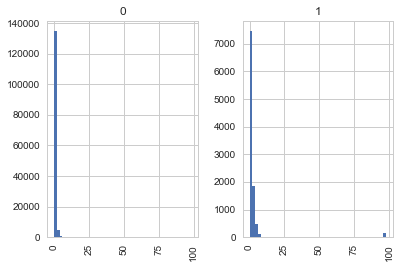

In [175]:
# Feature 3: NumberOfTime30-59DaysPastDueNotWorse
cs_train.hist(column='NumberOfTime30-59DaysPastDueNotWorse',by='SeriousDlqin2yrs',bins=50)

Text(0,0.5,'Serious Delinquencies')

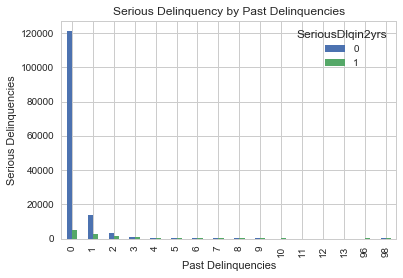

In [176]:
pd.crosstab(cs_train['NumberOfTime30-59DaysPastDueNotWorse'],cs_train.SeriousDlqin2yrs).plot(kind='bar')
plt.title('Serious Delinquency by Past Delinquencies')
plt.xlabel('Past Delinquencies')
plt.ylabel('Serious Delinquencies')

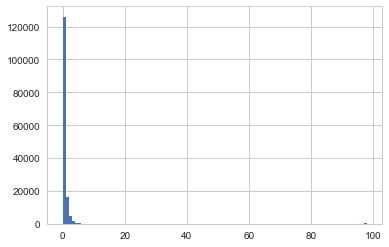

In [177]:
cs_train['NumberOfTime30-59DaysPastDueNotWorse'].hist(bins=100)

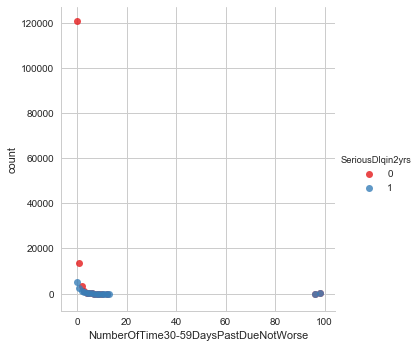

In [178]:
delinquency_by_past_due = cs_train[['NumberOfTime30-59DaysPastDueNotWorse', 'SeriousDlqin2yrs']].groupby(['NumberOfTime30-59DaysPastDueNotWorse', 'SeriousDlqin2yrs']).size().reset_index()
delinquency_by_past_due.columns = ['NumberOfTime30-59DaysPastDueNotWorse', 'SeriousDlqin2yrs', 'count']
sns.lmplot(x = 'NumberOfTime30-59DaysPastDueNotWorse', y = 'count', data = delinquency_by_past_due, hue = "SeriousDlqin2yrs", 
           palette="Set1", fit_reg = False)

The 'NumberOfTime30-59DaysPastDueNotWorse' seems to be a good predictor for the outcome variable.

In [179]:
delinquents=delinquency_by_past_due[(delinquency_by_past_due.SeriousDlqin2yrs==1)].sort_values(by='count', ascending=False)
delinquents.describe().T

,count,mean,std,min,25%,50%,75%,max
NumberOfTime30-59DaysPastDueNotWorse,16.0,17.8125,31.158132,0.0,3.75,7.5,11.25,98.0
SeriousDlqin2yrs,16.0,1.0000,0.000000,1.0,1.00,1.0,1.00,1.0
count,16.0,626.6250,1340.446735,1.0,3.75,51.0,393.00,5041.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11148fc18>,
      dtype=object)

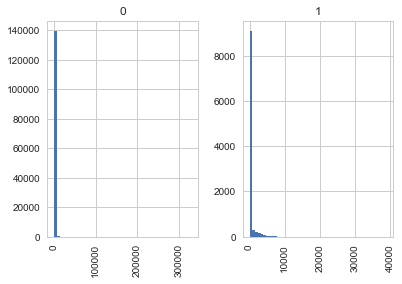

In [180]:
# Feature 4: DebtRatio
cs_train.hist(column='DebtRatio',by='SeriousDlqin2yrs',bins=50)

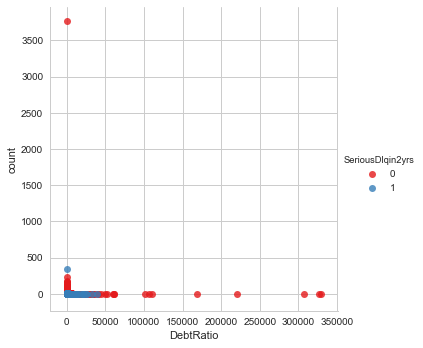

In [181]:
delinquency_by_debtratio = cs_train[['DebtRatio', 'SeriousDlqin2yrs']].groupby(['DebtRatio', 'SeriousDlqin2yrs']).size().reset_index()
delinquency_by_debtratio.columns = ['DebtRatio', 'SeriousDlqin2yrs', 'count']
sns.lmplot(x = 'DebtRatio', y = 'count', data = delinquency_by_debtratio, hue = "SeriousDlqin2yrs", 
           palette="Set1", fit_reg = False)

Debt Ratio may not be a good predictor of the outcome. Also, strangely, very high debt ratio is showing as not seriously delinquent!

In [182]:
delinquents=delinquency_by_debtratio[(delinquency_by_debtratio.SeriousDlqin2yrs==1)].sort_values(by='count', ascending=False)
delinquents.describe().T

,count,mean,std,min,25%,50%,75%,max
DebtRatio,9263.0,293.028195,1271.974024,0.0,0.208302,0.426661,0.810392,38793.0
SeriousDlqin2yrs,9263.0,1.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.0
count,9263.0,1.082371,3.535399,1.0,1.000000,1.000000,1.000000,340.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a26321470>,
      dtype=object)

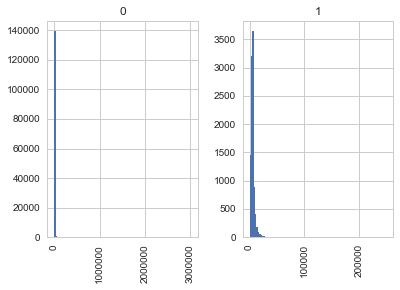

In [183]:
# Feature 5: MonthlyIncome
cs_train.hist(column='MonthlyIncome',by='SeriousDlqin2yrs',bins=100)

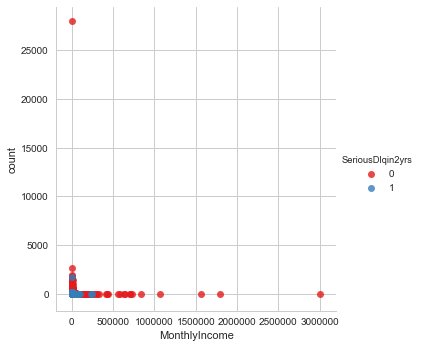

In [184]:
delinquency_by_income = cs_train[['MonthlyIncome', 'SeriousDlqin2yrs']].groupby(['MonthlyIncome', 'SeriousDlqin2yrs']).size().reset_index()
delinquency_by_income.columns = ['MonthlyIncome', 'SeriousDlqin2yrs', 'count']
sns.lmplot(x = 'MonthlyIncome', y = 'count', data = delinquency_by_income, hue = "SeriousDlqin2yrs", 
           palette="Set1", fit_reg = False)

Monthly Income may be a good predictor of the outcome

In [185]:
delinquents=delinquency_by_income[(delinquency_by_income.SeriousDlqin2yrs==1)].sort_values(by='count', ascending=False)
delinquents.describe().T

,count,mean,std,min,25%,50%,75%,max
MonthlyIncome,3103.0,6706.258209,8965.201349,0.0,3069.0,5004.0,7915.5,250000.0
SeriousDlqin2yrs,3103.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
count,3103.0,3.231067,31.177283,1.0,1.0,1.0,2.0,1669.0


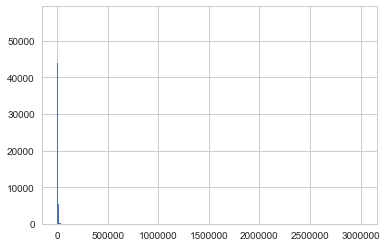

In [186]:
cs_train['MonthlyIncome'].hist(bins=1000)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a26b5c080>,
      dtype=object)

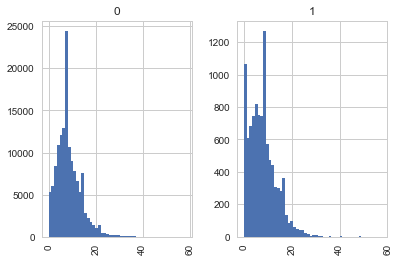

In [187]:
# Feature 6: NumberOfOpenCreditLinesAndLoans
cs_train.hist(column='NumberOfOpenCreditLinesAndLoans',by='SeriousDlqin2yrs',bins=50)

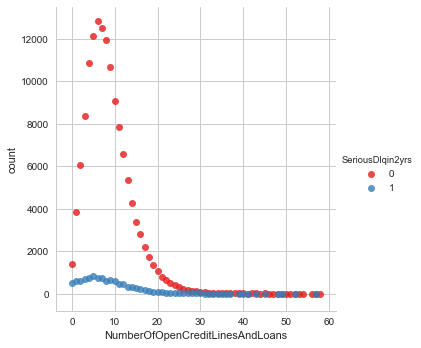

In [188]:
delinquency_by_opencredits = cs_train[['NumberOfOpenCreditLinesAndLoans', 'SeriousDlqin2yrs']].groupby(['NumberOfOpenCreditLinesAndLoans', 'SeriousDlqin2yrs']).size().reset_index()
delinquency_by_opencredits.columns = ['NumberOfOpenCreditLinesAndLoans', 'SeriousDlqin2yrs', 'count']
sns.lmplot(x = 'NumberOfOpenCreditLinesAndLoans', y = 'count', data = delinquency_by_opencredits, hue = "SeriousDlqin2yrs", 
           palette="Set1", fit_reg = False)

'NumberOfOpenCreditLinesAndLoans' seems to be a good predictor of the outcome variable.

In [189]:
delinquents=delinquency_by_opencredits[(delinquency_by_opencredits.SeriousDlqin2yrs==1)].sort_values(by='count', ascending=False)
delinquents.describe().T

,count,mean,std,min,25%,50%,75%,max
NumberOfOpenCreditLinesAndLoans,47.0,23.765957,15.009001,0.0,11.5,23.0,34.5,57.0
SeriousDlqin2yrs,47.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
count,47.0,213.319149,277.936269,1.0,2.0,43.0,456.5,819.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c283ec0b8>,
      dtype=object)

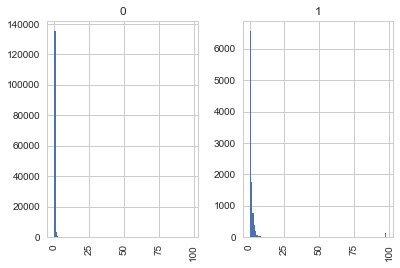

In [190]:
# Feature 7: NumberOfTimes90DaysLate
cs_train.hist(column='NumberOfTimes90DaysLate',by='SeriousDlqin2yrs',bins=100)

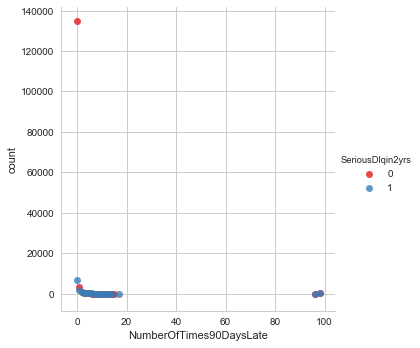

In [191]:
delinquency_by_latepmt = cs_train[['NumberOfTimes90DaysLate', 'SeriousDlqin2yrs']].groupby(['NumberOfTimes90DaysLate', 'SeriousDlqin2yrs']).size().reset_index()
delinquency_by_latepmt.columns = ['NumberOfTimes90DaysLate', 'SeriousDlqin2yrs', 'count']
sns.lmplot(x = 'NumberOfTimes90DaysLate', y = 'count', data = delinquency_by_latepmt, hue = "SeriousDlqin2yrs", 
           palette="Set1", fit_reg = False)

NumberOfTimes90DaysLate seems a good predictor of the outcome variable.

In [192]:
delinquents=delinquency_by_latepmt[(delinquency_by_latepmt.SeriousDlqin2yrs==1)].sort_values(by='count', ascending=False)
delinquents.describe().T

,count,mean,std,min,25%,50%,75%,max
NumberOfTimes90DaysLate,18.0,17.555556,29.282041,0.0,4.25,8.5,12.75,98.0
SeriousDlqin2yrs,18.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
count,18.0,557.000000,1558.754518,1.0,3.25,23.0,182.00,6554.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c2a09e208>,
      dtype=object)

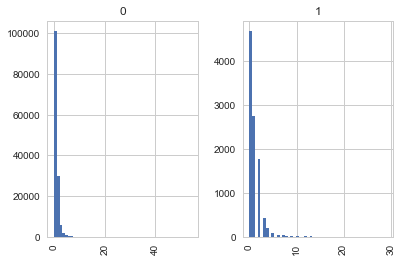

In [193]:
# Feature 8: NumberRealEstateLoansOrLines
cs_train.hist(column='NumberRealEstateLoansOrLines',by='SeriousDlqin2yrs',bins=50)

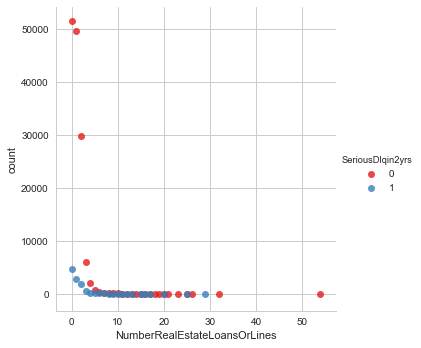

In [194]:
delinquency_by_realestateloans = cs_train[['NumberRealEstateLoansOrLines', 'SeriousDlqin2yrs']].groupby(['NumberRealEstateLoansOrLines', 'SeriousDlqin2yrs']).size().reset_index()
delinquency_by_realestateloans.columns = ['NumberRealEstateLoansOrLines', 'SeriousDlqin2yrs', 'count']
sns.lmplot(x = 'NumberRealEstateLoansOrLines', y = 'count', data = delinquency_by_realestateloans, hue = "SeriousDlqin2yrs", 
           palette="Set1", fit_reg = False)

NumberRealEstateLoansOrLines seems a good predictor of the outcome variable.

In [195]:
delinquents=delinquency_by_realestateloans[(delinquency_by_realestateloans.SeriousDlqin2yrs==1)].sort_values(by='count', ascending=False)
delinquents.describe().T

,count,mean,std,min,25%,50%,75%,max
NumberRealEstateLoansOrLines,20.0,10.65,7.902531,0.0,4.75,9.5,15.25,29.0
SeriousDlqin2yrs,20.0,1.00,0.000000,1.0,1.00,1.0,1.00,1.0
count,20.0,501.30,1207.323752,1.0,1.75,10.0,110.75,4672.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c2f8ab390>,
      dtype=object)

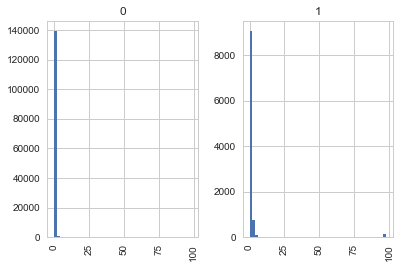

In [196]:
# Feature 9: NumberOfTime60-89DaysPastDueNotWorse
cs_train.hist(column='NumberOfTime60-89DaysPastDueNotWorse',by='SeriousDlqin2yrs',bins=50)

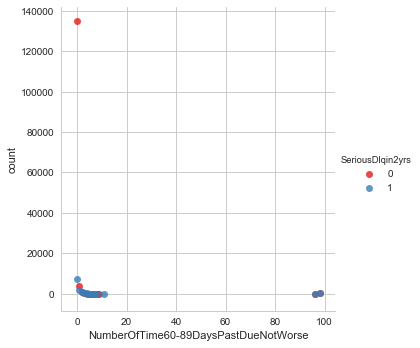

In [197]:
delinquency_by_longpastdue = cs_train[['NumberOfTime60-89DaysPastDueNotWorse', 'SeriousDlqin2yrs']].groupby(['NumberOfTime60-89DaysPastDueNotWorse', 'SeriousDlqin2yrs']).size().reset_index()
delinquency_by_longpastdue.columns = ['NumberOfTime60-89DaysPastDueNotWorse', 'SeriousDlqin2yrs', 'count']
sns.lmplot(x = 'NumberOfTime60-89DaysPastDueNotWorse', y = 'count', data = delinquency_by_longpastdue, hue = "SeriousDlqin2yrs", 
           palette="Set1", fit_reg = False)

NumberOfTime60-89DaysPastDueNotWorse may not be a good predictor of the outcome.

In [198]:
delinquents=delinquency_by_longpastdue[(delinquency_by_longpastdue.SeriousDlqin2yrs==1)].sort_values(by='count', ascending=False)
delinquents.describe().T

,count,mean,std,min,25%,50%,75%,max
NumberOfTime60-89DaysPastDueNotWorse,12.0,20.083333,36.061711,0.0,2.75,5.5,8.75,98.0
SeriousDlqin2yrs,12.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
count,12.0,835.500000,2084.640039,1.0,4.75,43.0,275.25,7256.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c31213b70>,
      dtype=object)

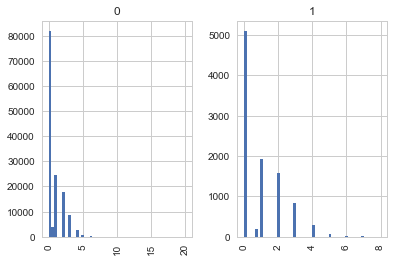

In [199]:
# Feature 10: NumberOfDependents
cs_train.hist(column='NumberOfDependents',by='SeriousDlqin2yrs',bins=50)

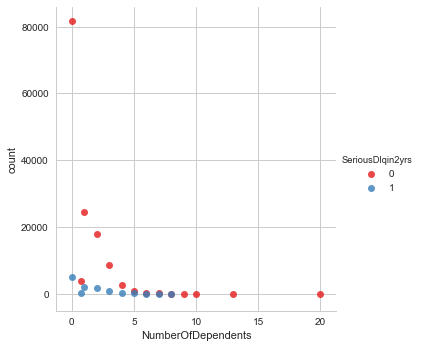

In [200]:
delinquency_by_dependents = cs_train[['NumberOfDependents', 'SeriousDlqin2yrs']].groupby(['NumberOfDependents', 'SeriousDlqin2yrs']).size().reset_index()
delinquency_by_dependents.columns = ['NumberOfDependents', 'SeriousDlqin2yrs', 'count']
sns.lmplot(x = 'NumberOfDependents', y = 'count', data = delinquency_by_dependents, hue = "SeriousDlqin2yrs", 
           palette="Set1", fit_reg = False)

NumberOfDependents seems to be a good predictor of the outcome variable.

In [201]:
delinquents=delinquency_by_dependents[(delinquency_by_dependents.SeriousDlqin2yrs==1)].sort_values(by='count', ascending=False)
delinquents.describe().T

,count,mean,std,min,25%,50%,75%,max
NumberOfDependents,10.0,3.675722,2.778170,0.0,1.25,3.5,5.75,8.0
SeriousDlqin2yrs,10.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
count,10.0,1002.600000,1598.133856,2.0,35.00,238.0,1397.25,5095.0


# Predictors & Response variables

In [202]:
cs_train_vars=cs_train.columns.values.tolist()
y=['SeriousDlqin2yrs']
X=[i for i in cs_train_vars if i not in y]

# Feature Selection

In [203]:
from sklearn.feature_selection import RFE
logreg = LogisticRegression()
rfe = RFE(logreg, 18)
rfe = rfe.fit(cs_train[X], cs_train[y].values.ravel() )
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1]


RFE suggests using all the features. Hence, we will try and model first using all the features and then re-model using the EDA insights we have gathered above and then compare the two models to arrive at the final model.

# Implementing the model

In [204]:
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
import statsmodels.api as sm
logit_model=sm.Logit(cs_train[y].values.ravel(),cs_train[X])
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.228500
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               150000
Model:                          Logit   Df Residuals:                   149990
Method:                           MLE   Df Model:                            9
Date:                Mon, 27 Aug 2018   Pseudo R-squ.:                 0.06882
Time:                        19:45:53   Log-Likelihood:                -34275.
converged:                       True   LL-Null:                       -36808.
                                        LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
RevolvingUtilizationOfUnsecuredLines -5.907e-05   6.63e-

The p-values for most of the variables are smaller than 0.05, therefore, most of them are significant to the model.

## Logistic Regression Model Fitting

In [205]:
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(cs_train[X], cs_train[y].values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [243]:
# Load the test data
cs_test = pd.read_csv( 'cs-test.csv' )
cs_test.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [244]:
cs_test.shape

(101503, 12)

In [245]:
# rename the id column
cs_test.rename(columns={'Unnamed: 0':'Id'},inplace=True)

In [246]:
cs_test.isnull().sum()

Id                                           0
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64

In [247]:
# impute missing values
cs_test.fillna(cs_test.mean(), inplace=True)

In [248]:
cs_test_vars=cs_test.columns.values.tolist()
y_test=['SeriousDlqin2yrs']
X_test=[i for i in cs_test_vars if i not in y]
X_test.remove('Id')

In [249]:
y_pred = logreg.predict(cs_test[X_test])
#print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(cs_test[X_test], cs_test[y_test])))

In [250]:
# Populate the outcome variable with the predicted values
cs_test.SeriousDlqin2yrs = y_pred

In [251]:
cs_test.head()

,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,0,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,0,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,0,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,0,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [252]:
cs_test.SeriousDlqin2yrs.value_counts()

0    101290
1       213
Name: SeriousDlqin2yrs, dtype: int64

In [253]:
# Predict the probabilities
y_prob = logreg.predict_proba(cs_test[X_test])
y_prob

array([[0.92310431, 0.07689569],
       [0.95466812, 0.04533188],
       [0.9577153 , 0.0422847 ],
       ...,
       [0.97658277, 0.02341723],
       [0.96710617, 0.03289383],
       [0.88004481, 0.11995519]])

In [254]:
# Add a new column with the probability of being SeriousDlqin2yrs=Yes(1)
Probability = y_prob[:,1]
Probability

array([0.07689569, 0.04533188, 0.0422847 , ..., 0.02341723, 0.03289383,
       0.11995519])

In [255]:
cs_test['Probability'] = Probability

In [256]:
cs_test[['Id','Probability']].head()

,Id,Probability
0,1,0.076896
1,2,0.045332
2,3,0.042285
3,4,0.157541
4,5,0.165653


In [237]:
# write the results to csv
cs_test[['Id','Probability']].to_csv('cs_test_predicted_model1.csv',index=False)

In [260]:
# Load the test result data
result_test = pd.read_csv( 'sampleEntry.csv' )
result_test['y_test']=[1 if i>0.5 else 0 for i in result_test['Probability']]
result_test.head()

,Id,Probability,y_test
0,1,0.080807,0
1,2,0.040719,0
2,3,0.011968,0
3,4,0.067640,0
4,5,0.108264,0


In [262]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(cs_test[X_test], result_test['y_test'])))

Accuracy of logistic regression classifier on test set: 0.98


In [263]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(result_test['y_test'], cs_test[y_test])
print(confusion_matrix)

[[99700    98]
 [ 1590   115]]


The result is telling us that we have 99700+115 correct predictions and 1590+98 incorrect predictions.

In [264]:
# precision = tp / (tp + fp)
# recall = tp / (tp + fn)
# F1-score = weighted harmonic mean of the precision and recall
from sklearn.metrics import classification_report
print(classification_report(result_test['y_test'], cs_test[y_test]))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99     99798
          1       0.54      0.07      0.12      1705

avg / total       0.98      0.98      0.98    101503



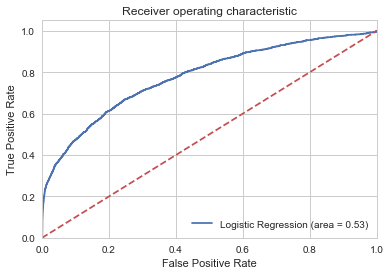

In [265]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(result_test['y_test'], logreg.predict(cs_test[X_test]))
fpr, tpr, thresholds = roc_curve(result_test['y_test'], logreg.predict_proba(cs_test[X_test])[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

## Cross Validation

In [266]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, cs_train[X], cs_train[y].values.ravel(), cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.934


The average accuracy (93.4%) is lower than the Logistic Regression model accuracy (98%).

# Re-model with feature selection

In [267]:
y=['SeriousDlqin2yrs']
# Exclude 'RevolvingUtilizationOfUnsecuredLines','DebtRatio'
X=['age','NumberOfTime30-59DaysPastDueNotWorse',
  'MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines',
  'NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']

In [268]:
logreg2 = LogisticRegression()
logreg2.fit(cs_train[X], cs_train[y].values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [269]:
y_pred = logreg2.predict(cs_test[X])
cs_test.SeriousDlqin2yrs = y_pred

In [271]:
cs_test.SeriousDlqin2yrs.value_counts()

0    101016
1       487
Name: SeriousDlqin2yrs, dtype: int64

In [273]:
# Predict the probabilities
y_prob = logreg2.predict_proba(cs_test[X])
# Add a new column with the probability of being SeriousDlqin2yrs=Yes(1)
Probability = y_prob[:,1]
cs_test['Probability'] = Probability

In [274]:
cs_test.head()

,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Probability
0,1,0,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0,0.061011
1,2,0,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0,0.048145
2,3,0,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0,0.046711
3,4,0,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0,0.124866
4,5,0,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0,0.108748


In [275]:
cs_test[['Id','Probability']].head()

,Id,Probability
0,1,0.061011
1,2,0.048145
2,3,0.046711
3,4,0.124866
4,5,0.108748


In [276]:
# write the results to csv
cs_test[['Id','Probability']].to_csv('cs_test_predicted_model2.csv',index=False)

In [277]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg2.score(cs_test[X], result_test['y_test'])))

Accuracy of logistic regression classifier on test set: 0.98


In [284]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(result_test['y_test'], cs_test[y])
print(confusion_matrix)

[[99610   188]
 [ 1406   299]]


The result is telling us that we have 99610+299 correct predictions and 1406+188 incorrect predictions.

In [285]:
# precision = tp / (tp + fp)
# recall = tp / (tp + fn)
# F1-score = weighted harmonic mean of the precision and recall
from sklearn.metrics import classification_report
print(classification_report(result_test['y_test'], cs_test[y]))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99     99798
          1       0.61      0.18      0.27      1705

avg / total       0.98      0.98      0.98    101503



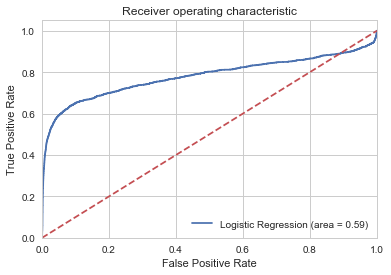

In [287]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(result_test['y_test'], logreg2.predict(cs_test[X]))
fpr, tpr, thresholds = roc_curve(result_test['y_test'], logreg2.predict_proba(cs_test[X])[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [288]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, cs_train[X], cs_train[y].values.ravel(), cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.934


## With all features we got:
0  :  101290

1  :    213

## With few features excluded we got:
0  :  101016

1  :    487